#### Velocidad media de bajada de internet por provincia

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
df_bajada=pd.read_csv('./10_Velocidad Media de bajada de Internet por provincia y nacional_OK.csv')

In [24]:
df_bajada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    float64
 4   Año-Trimestre           840 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.9+ KB


In [7]:
df_bajada['Mbps (Media de bajada)']=df_bajada['Mbps (Media de bajada)'].round(1)

In [9]:
df_bajada=df_bajada[df_bajada['Año']>2013]

In [14]:
#df_bajada[['Año','Trimestre']]=df_bajada[['Año','Trimestre']].astype(str)
df_bajada['Año-Trimestre']=df_bajada['Año'].astype(str)+'-'+df_bajada['Trimestre'].astype(str)

In [25]:
df_bajada.sort_values(by=['Año','Trimestre'],ascending=True)

,Año,Trimestre,Provincia,Mbps (Media de bajada),Año-Trimestre
816,2014,1,Buenos Aires,3.7,2014-1
817,2014,1,Capital Federal,4.0,2014-1
818,2014,1,Catamarca,2.8,2014-1
819,2014,1,Chaco,3.3,2014-1
820,2014,1,Chubut,3.2,2014-1
...,...,...,...,...,...
19,2022,3,Santa Cruz,12.6,2022-3
20,2022,3,Santa Fe,45.2,2022-3
21,2022,3,Santiago Del Estero,17.7,2022-3
22,2022,3,Tierra Del Fuego,11.0,2022-3


In [22]:
df_bajada.to_csv('./10_Velocidad Media de bajada de Internet por provincia y nacional_OK.csv',index=False)

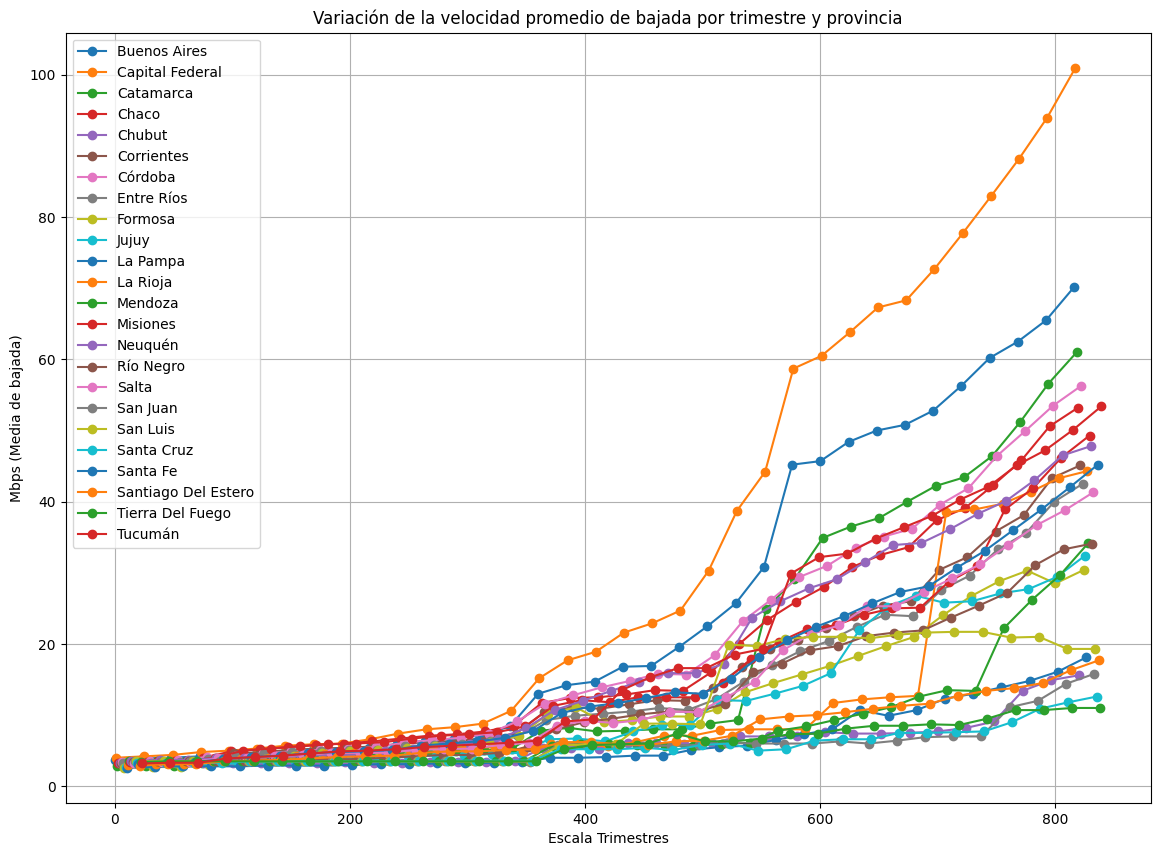

In [50]:


# Obtener los datos requeridos del DataFrame
df_subset = df_bajada[['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']]

# Agrupar los datos por provincia y calcular el promedio de Mbps (Media de bajada)
df_avg_speed = df_subset.groupby(['Año', 'Trimestre', 'Provincia']).mean().reset_index()

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(14, 10))

# Iterar sobre las provincias y crear una línea para cada una
for provincia in df_avg_speed['Provincia'].unique():
    df_provincia = df_avg_speed[df_avg_speed['Provincia'] == provincia]
    ax.plot(df_provincia.index, df_provincia['Mbps (Media de bajada)'], marker='o', label=provincia)

# Configurar los ejes y etiquetas

# Añadir las etiquetas al eje x
#ax.set_xticks(df_avg_speed.index,rotation=45)
#ax.set_xticklabels(df_bajada['Año-Trimestre'], rotation=90)

ax.set_xlabel('Escala Trimestres')
ax.set_ylabel('Mbps (Media de bajada)')
ax.set_title('Variación de la velocidad promedio de bajada por trimestre y provincia')
ax.legend(loc='upper left')
ax.grid()

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los datos requeridos del DataFrame
df_subset = df_bajada[['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']]

# Agrupar los datos por año, trimestre y provincia y calcular el promedio de Mbps (Media de bajada)
df_avg_speed = df_subset.groupby(['Año', 'Trimestre', 'Provincia']).mean().reset_index()

# Reorganizar los datos en un DataFrame pivote para el gráfico de barras apiladas
df_pivot = df_avg_speed.pivot(index='Provincia', columns=['Año', 'Trimestre'], values='Mbps (Media de bajada)')

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True, ax=ax)

# Configurar los ejes y etiquetas
ax.set_xlabel('Provincia')
ax.set_ylabel('Mbps (Media de bajada)')
ax.set_title('Variación de la velocidad promedio de bajada por provincia y trimestre')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\TheFercho\AppData\Local\Temp\ipykernel_6944\736386112.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_avg_speed['Provincia'], rotation=90)


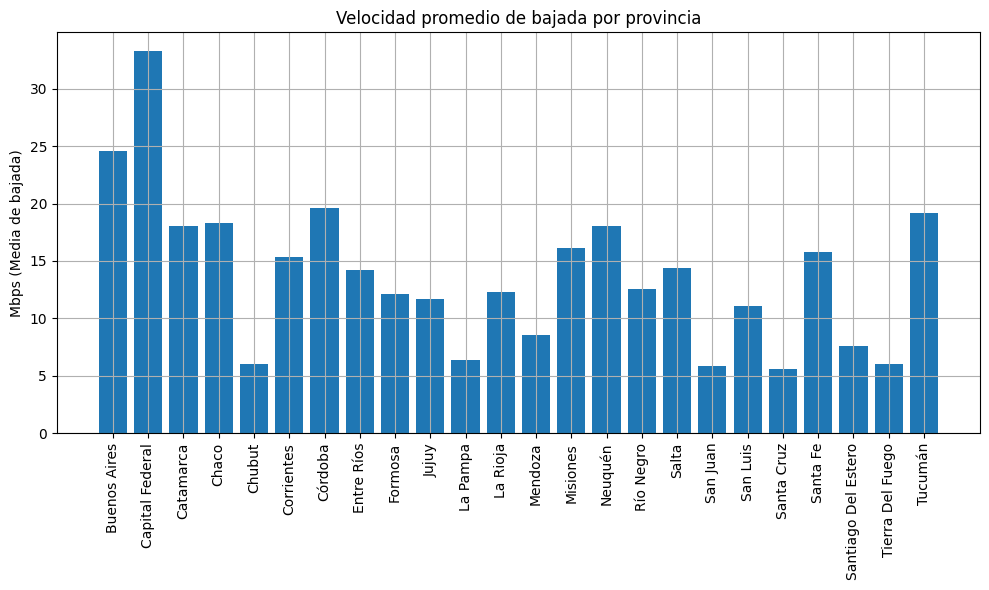

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los datos requeridos del DataFrame
df_subset = df_bajada[['Provincia', 'Mbps (Media de bajada)']]

# Calcular la velocidad promedio actual por provincia
df_avg_speed = df_subset.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_avg_speed['Provincia'], df_avg_speed['Mbps (Media de bajada)'])

# Configurar los ejes y etiquetas
#ax.set_xlabel('Provincia')
ax.set_ylabel('Mbps (Media de bajada)')
ax.set_title('Velocidad promedio de bajada por provincia')
# Rotar los nombres de las provincias
ax.set_xticklabels(df_avg_speed['Provincia'], rotation=90)
ax.grid()


# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\TheFercho\AppData\Local\Temp\ipykernel_6944\1434418865.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_avg_speed['Provincia'], rotation=90)


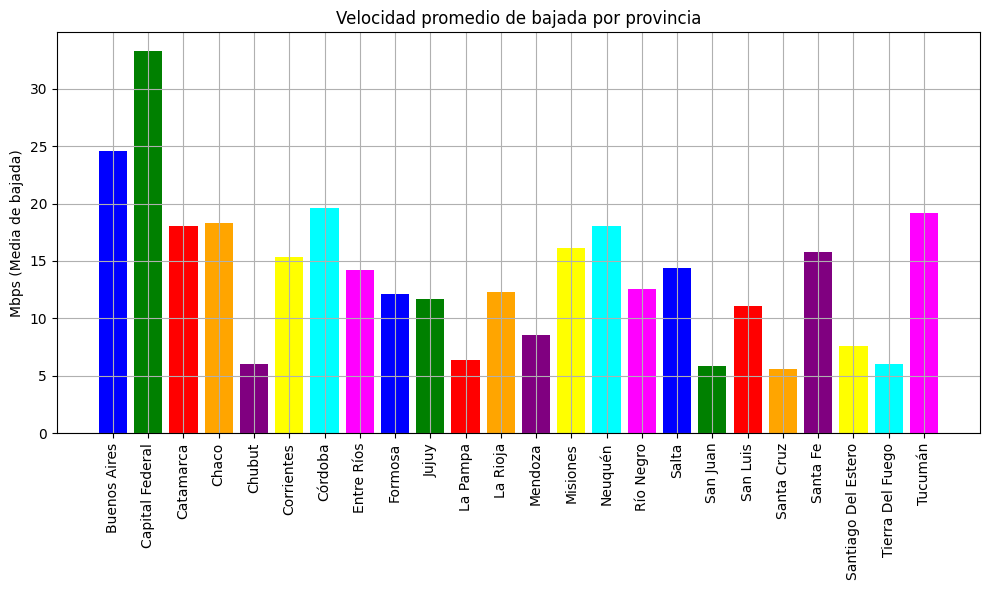

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los datos requeridos del DataFrame
df_subset = df_bajada[['Provincia', 'Mbps (Media de bajada)']]

# Calcular la velocidad promedio actual por provincia
df_avg_speed = df_subset.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()

# Crear una lista de colores para las barras
colores = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_avg_speed['Provincia'], df_avg_speed['Mbps (Media de bajada)'], color=colores)

# Configurar los ejes y etiquetas
# ax.set_xlabel('Provincia')
ax.set_ylabel('Mbps (Media de bajada)')
ax.set_title('Velocidad promedio de bajada por provincia')
ax.grid()

# Rotar los nombres de las provincias
ax.set_xticklabels(df_avg_speed['Provincia'], rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
# plt.savefig('grafico.png')


In [63]:
df_avg_speed.round(1).sort_values(by='Mbps (Media de bajada)',ascending=False)

,Provincia,Mbps (Media de bajada)
1,Capital Federal,33.3
0,Buenos Aires,24.6
6,Córdoba,19.6
23,Tucumán,19.2
3,Chaco,18.3
14,Neuquén,18.0
2,Catamarca,18.0
13,Misiones,16.2
20,Santa Fe,15.8
5,Corrientes,15.4


In [72]:
promedio_pais = df_bajada['Mbps (Media de bajada)'].mean()
promedio_pais.round(2)

13.86